In [41]:
# Import modules
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from minisom import MiniSom
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

In [42]:
# Constants
# Inizializzazione del dataset e dei parametri
DATA_PATH = "/users/mik2002/som/dataset-processed UNSW-NB15/"
DATA_FILE = "dataset-processed-UNSW-NB15.csv"

# Carichiamo il dataset combinato e processato
df_dataset = pd.read_csv(DATA_PATH + DATA_FILE)

In [43]:
pd.set_option('display.max_columns', None)
df_dataset.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,ct_src_ltm,ct_srv_dst,proto_tcp,proto_udp,proto_unas,proto_arp,proto_others,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,service_others,state_ACC,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_-,state_others,attack_cat,label
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Normal,0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,1,6,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Normal,0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,2,6,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Normal,0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Normal,0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,2,39,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Normal,0


In [44]:
# Drop the 'attack_cat' column se ancora presente (può essere già stato rimosso nel dataset processato)
if 'label' in df_dataset.columns:
    df_dataset = df_dataset.drop(columns=['label'])
df_dataset.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,ct_src_ltm,ct_srv_dst,proto_tcp,proto_udp,proto_unas,proto_arp,proto_others,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,service_others,state_ACC,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_-,state_others,attack_cat
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Normal
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,1,6,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Normal
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,2,6,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Normal
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Normal
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,2,39,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Normal


In [45]:
# Visualize label of dataset
df_dataset['attack_cat'].value_counts()

attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64

In [46]:
# Rimuovi le righe con le categorie "Generic" e "Worms"
df_dataset = df_dataset[(df_dataset["attack_cat"] != "Generic") & (df_dataset["attack_cat"] != "Worms")]

# Applica la mappatura delle classi di attacco a valori numerici, ordinate
df_dataset["attack_cat"] = df_dataset["attack_cat"].map({
    "Normal": 0,
    "Exploits": 1,
    "Backdoor": 2,
    "Shellcode": 2,
    "Fuzzers": 2,
    "DoS": 3,
    "Reconnaissance": 4,
    "Analysis": 4
})

In [47]:
df_dataset['attack_cat'].value_counts()

attack_cat
0    93000
1    44525
2    28086
4    16664
3    16353
Name: count, dtype: int64

In [49]:
# Calcola il conteggio delle etichette
count_labels = df_dataset["attack_cat"].value_counts()

# Calcola il numero totale di etichette
total_count = count_labels.sum()

# Calcola e stampa le percentuali per ogni classe
for label, count in count_labels.items():
    percent = (count / total_count) * 100
    print(f"Percentage of label {label}: {percent:.2f}%")


Percentage of label 0: 46.82%
Percentage of label 1: 22.42%
Percentage of label 2: 14.14%
Percentage of label 4: 8.39%
Percentage of label 3: 8.23%


In [50]:
# split dataset in data and target 
target = df_dataset.iloc[:len(df_dataset),-1].values
data = df_dataset.iloc[:len(df_dataset),:-1]

In [51]:
# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [52]:
# split data in Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(data, target,test_size=0.2)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 158902 samples.
Testing set has 39726 samples.


In [53]:
# since this in supervised classification not unsupervised, this function chooses the class of
# the BMU to be the final class of each instance
def classify(som, data):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(X_train, y_train)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [54]:
# set hyperparameters
n_neurons = 30
m_neurons = 30
input_len = X_train.shape[1]
sigma = 1.5
learning_rate = 1.2
iterations = X_train.shape[0]

In [55]:
from minisom import MiniSom
# initialization
som = MiniSom(x=n_neurons, y=m_neurons,input_len=input_len,sigma=sigma,learning_rate=learning_rate)
som.random_weights_init(X_train)

In [56]:
%%time
som.train(X_train, iterations, verbose=True)  # random training

 [ 158902 / 158902 ] 100% - 0:00:00 left 
 quantization error: 0.07882013771528641
CPU times: user 1min 30s, sys: 1.56 s, total: 1min 32s
Wall time: 1min 19s


In [57]:
%%time
y_pred = classify(som, X_test)
report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.7867    0.8947    0.8372     18654
           1     0.5661    0.8747    0.6874      8914
           2     0.4519    0.2496    0.3216      5592
           3     0.4585    0.0495    0.0893      3234
           4     0.5991    0.2341    0.3366      3332

    accuracy                         0.6752     39726
   macro avg     0.5725    0.4605    0.4544     39726
weighted avg     0.6476    0.6752    0.6281     39726

CPU times: user 34.4 s, sys: 8.07 ms, total: 34.4 s
Wall time: 34.4 s


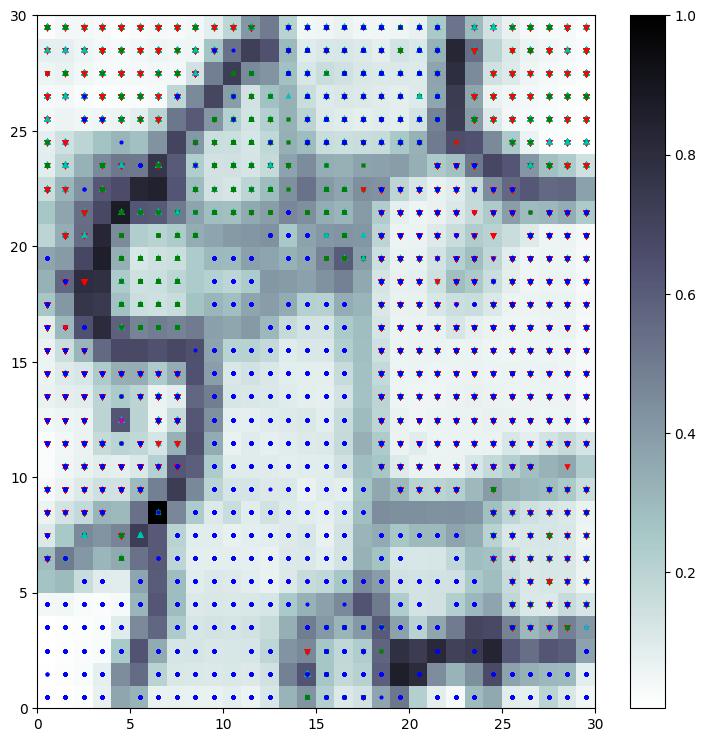

CPU times: user 3min 43s, sys: 3.38 s, total: 3min 46s
Wall time: 3min 46s


In [58]:
%%time
import matplotlib.pyplot as plt
%matplotlib inline

# Definisci i marker e i colori per ogni etichetta
markers = ['o', 's', 'v', '^', 'p', '*', '+', 'x']  # Aggiungi più marker se necessario
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']  # Aggiungi più colori se necessario

# Crea una figura
plt.figure(figsize=(9, 9))

# Plotta la mappa delle distanze come sfondo
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

# Traccia la risposta per ogni pattern nel dataset processato
# Colori e marker differenti per ogni etichetta
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # Ottieni il vincitore
    # Posiziona un marker sulla posizione vincente per il campione xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]], markerfacecolor=colors[target[cnt]],
             markeredgecolor=colors[target[cnt]], markersize=1, markeredgewidth=2)

# Mostra la figura
plt.show()

In [ ]:
%%time
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the processed_friday_dataset
# different colors and markers for each label
markers = ['s', 'v']
colors = ['g', 'r']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]], markerfacecolor=colors[target[cnt]],
             markeredgecolor=colors[target[cnt]], markersize=1, markeredgewidth=2)

plt.show()